In [ ]:
s# k Nearest Neighbors
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [ ]:
# Read the CSV file
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HD/Heart Disease Dataset.csv")

In [ ]:
# Check for missing values and fill with the mean value of each column
data.fillna(data.mean(), inplace=True)

In [ ]:
# Convert continuous target variable into binary classes
data['num'] = data['num'].apply(lambda x: 1 if x > 0 else 0)


In [ ]:
# Preparing input and output data
x = data[['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
          'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = data['num']

In [ ]:
# Handle imbalanced data using SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
# Normalize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_resampled)

In [ ]:
# Split the scaled features into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# Hyperparameter tuning using GridSearchCV for KNeighborsClassifier
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [ ]:
# Best parameters found by GridSearchCV
best_params = grid_search.best_params_

In [ ]:
# Apply KNeighborsClassifier with the best parameters
model = KNeighborsClassifier(**best_params)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
# Predict on the test set
y_pred = model.predict(x_test)

In [ ]:
# Calculate training and testing accuracy
acc_train = model.score(x_train, y_train)
print("Training Accuracy:", acc_train)

acc_test = model.score(x_test, y_test)
print("Testing Accuracy:", acc_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.8787878787878788
Accuracy:  0.8787878787878788


In [ ]:
# Calculate F1 score, recall, and precision
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87        30
           1       0.89      0.89      0.89        36

    accuracy                           0.88        66
   macro avg       0.88      0.88      0.88        66
weighted avg       0.88      0.88      0.88        66



In [ ]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:

# Extract true positives, true negatives, false positives, and false negatives
tn, fp, fn, tp = conf_matrix.ravel()

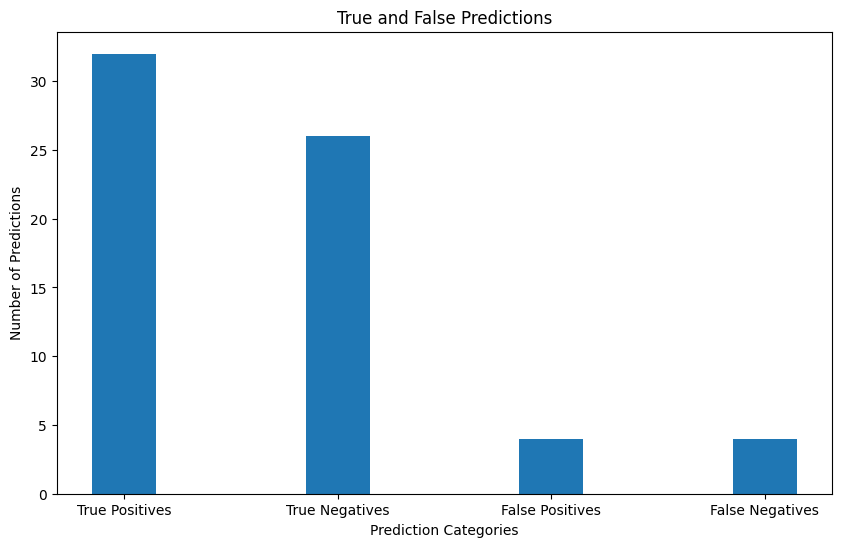

In [ ]:
# Plot the bar graph for true and false predictions
categories = ['True Positives', 'True Negatives', 'False Positives', 'False Negatives']
values = [tp, tn, fp, fn]

plt.figure(figsize=(, 6))
plt.bar(categories, values, width=0.3)
plt.xlabel('Prediction Categories')
plt.ylabel('Number of Predictions')
plt.title('True and False Predictions')
plt.show()